In [81]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

### Loading and inspecting the dataset.

In [22]:
df = pd.read_csv('data.csv', sep=',')

Renaming columns.

In [24]:
df.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Life expectancy at birth (years)': 'life_expectancy',
    'GDP': 'gdp'
}, inplace=True)

In [59]:

df.tail(10)

,country,year,life_expectancy,gdp
86,Zimbabwe,2006,45.40,5443896500.00
87,Zimbabwe,2007,46.60,5291950100.00
88,Zimbabwe,2008,48.20,4415702800.00
89,Zimbabwe,2009,50.00,8621573608.00
90,Zimbabwe,2010,52.40,10141859710.00
91,Zimbabwe,2011,54.90,12098450749.00
92,Zimbabwe,2012,56.60,14242490252.00
93,Zimbabwe,2013,58.00,15451768659.00
94,Zimbabwe,2014,59.20,15891049236.00
95,Zimbabwe,2015,60.70,16304667807.00


Looking to size and shape of the dataset.

In [19]:
(df.shape)

(96, 4)

Which columns are present?

In [20]:
print(df.columns)

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')


Another information about the dataset.

In [25]:
print(df.info())
print()
print(df['country'].unique().tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


There are six counties in dataset: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'. 

There is no missing data in the dataset.

### Line Charts

The chart below shows looks at life expectancy over the years.

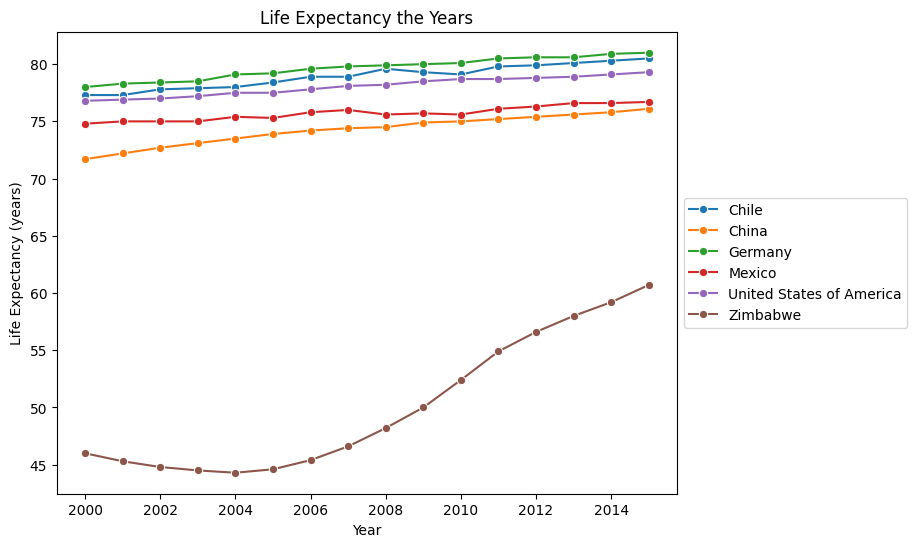

In [96]:
# creting a plot showing life expectancy by year
plt.figure(figsize=(8, 6), frameon=True)
sns.lineplot(data=df, x='year', y='life_expectancy', hue='country', marker='o', linestyle='-')
plt.title('Life Expectancy the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

Using a facegrid to show life expectancy by country and year.

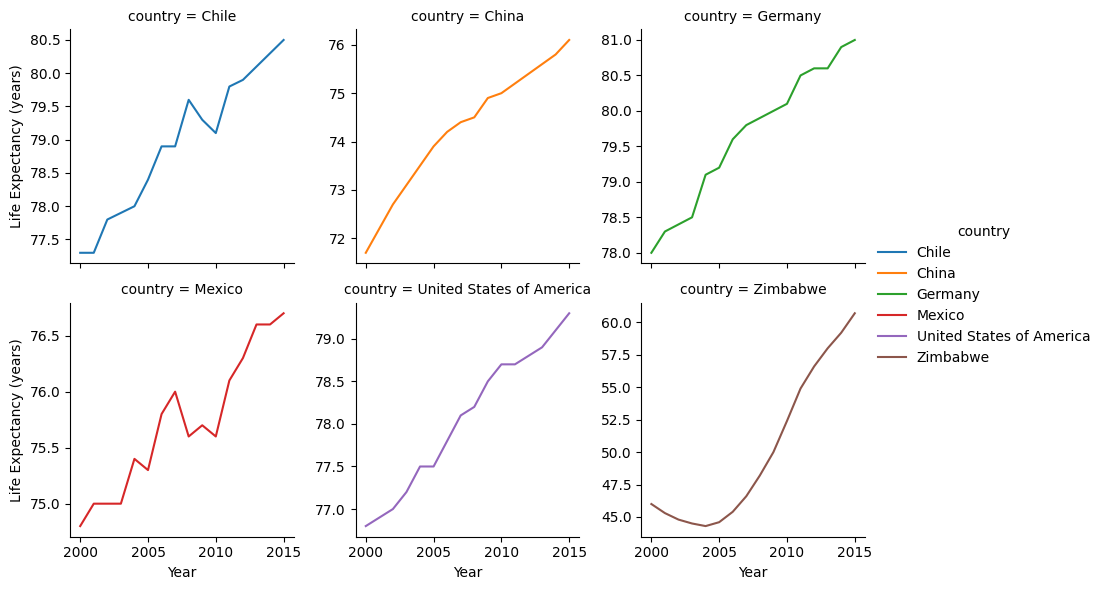

In [106]:
# create a FaceGrid object
graphLE = sns.FacetGrid(data=df, col='country', hue='country', col_wrap=3, sharey=False)
# usinng .map method to plot the data
graphLE = graphLE.map(sns.lineplot, 'year', 'life_expectancy')
# add legend
graphLE.add_legend()
# set axis labels
graphLE.set_axis_labels('Year', 'Life Expectancy (years)')

plt.show()

### Insights from the Life Expectancy Line Plots

1. Overall, life expectancy has increased in all observed countries over the past 15 years.  
2. The plot shows a significant gap in life expectancy between Zimbabwe and the other countries.  
3. From 2000 to 2004, Zimbabwe experienced a decline in life expectancy, which may indicate a period of national crisis.  
4. Starting in 2004, Zimbabwe's life expectancy began to grow at a faster rate compared to the other countries.  
5. In Mexico and Chile, life expectancy decreased between 2007 and 2010.  


The chart below shows looks at GDP over the years.

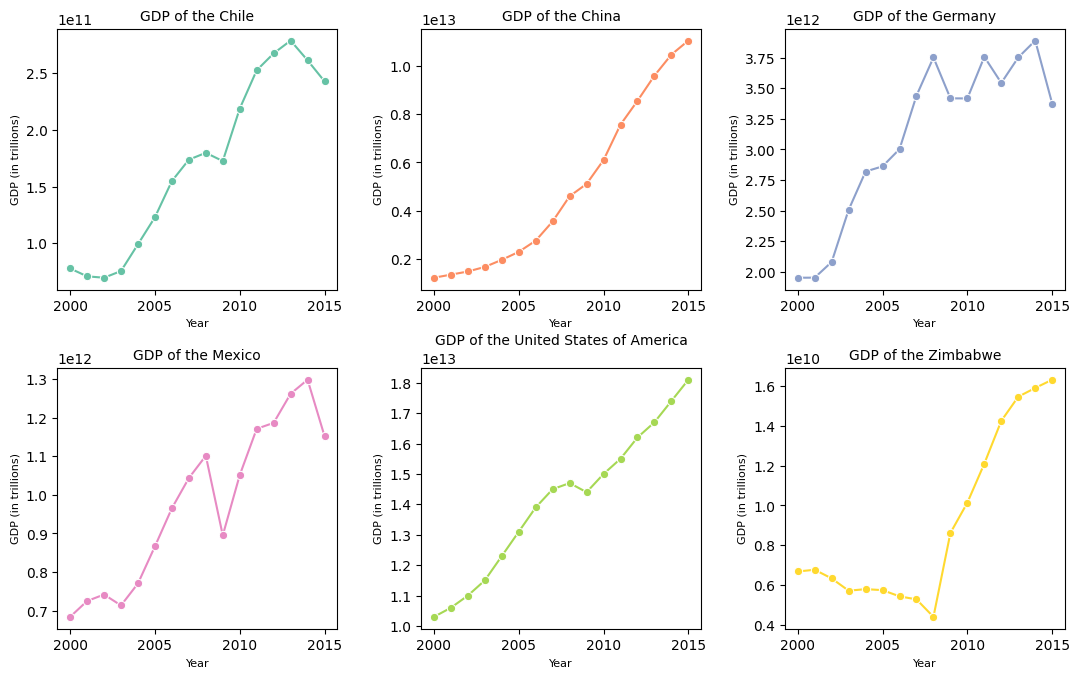

In [13]:
# creting a plots showing GDP by year without FacetGrid
plt.figure(figsize=(13, 10), frameon=True)

number_of_countries = len(df['country'].unique())
countries = df['country'].unique()
# color palette for lines
colors = sns.color_palette("Set2", n_colors=number_of_countries)
# creating plot for each country
for i in range(number_of_countries):
    ax = plt.subplot(2, 3, i+1)
    # plotting GDP for counntry
    sns.lineplot(data=df[(df['country'] == countries[i])], x='year', y='gdp', marker='o', linestyle='-', color=colors[i], ax=ax)
    plt.title(f'GDP of the {countries[i]}', fontsize=10)
    plt.xlabel('Year', fontsize=8)
    plt.ylabel('GDP (in trillions)', fontsize=8)
    # ax.set_xticks(sorted(df['year'].unique()))
    # ax.set_xticklabels(df['year'].unique(), fontsize=6, rotation=45)

# adjusting the subplot
plt.subplots_adjust(bottom=0.3, wspace=0.3, hspace=0.3, top=0.9)
plt.show()

### Insights from the GDP Line Plot:

1. China's GDP has been growing steadily every year without any declines.  
2. The United States showed negative GDP growth in 2008, during the global financial crisis.  
3. Germany's economy has been stagnating since 2008.  
4. The 2008 crisis significantly affected Mexico, and the country showed one of the worst GDP trends among all the analyzed countries.  
5. Zimbabwe experienced a long and systematic decline in GDP from 2000 to 2008, followed by a sharp recovery and a strong positive growth trend in the following years.

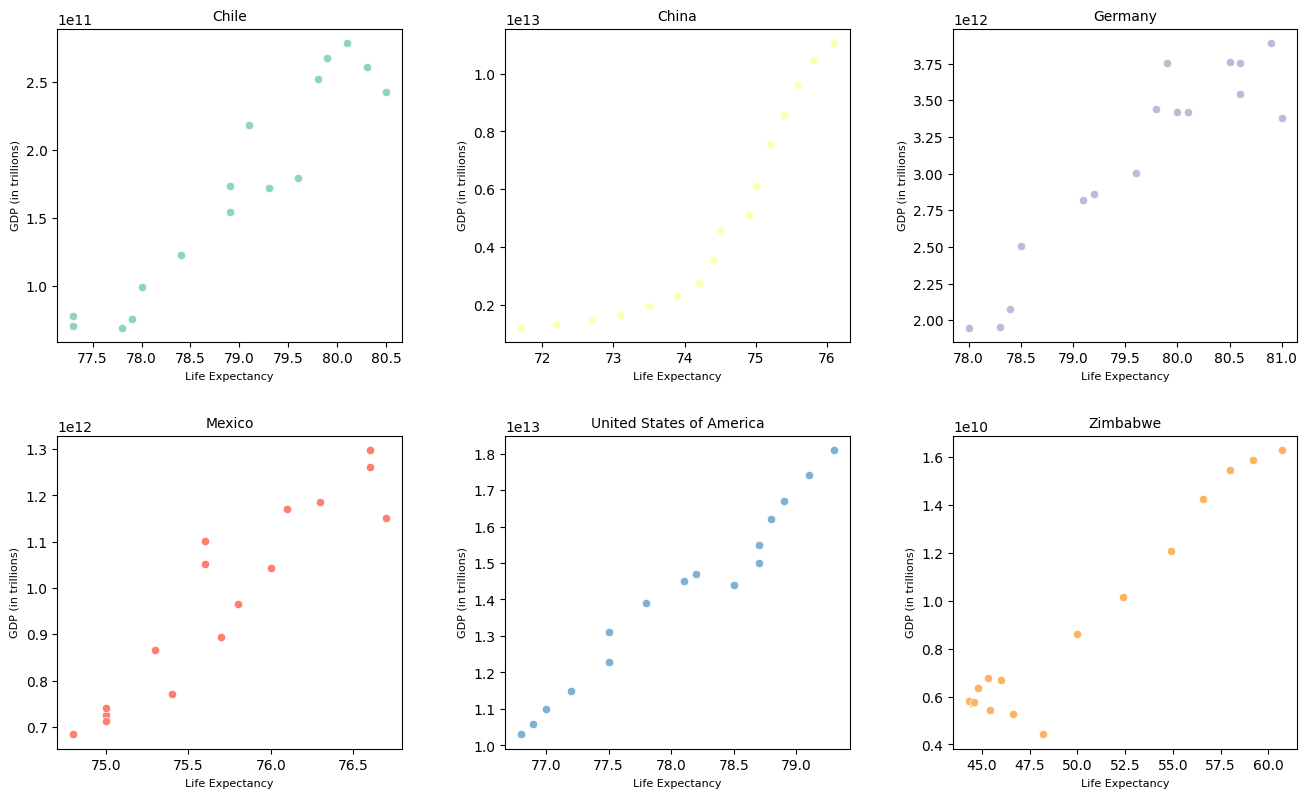

In [12]:
# creating a scatter plot showing GDP vs Life Expectancy
plt.figure(figsize=(16, 12), frameon=True)

number_of_countries = len(df['country'].unique())
countries = df['country'].unique()
# color palette for lines
colors = sns.color_palette("Set3", n_colors=number_of_countries)
# creating plot for each country
for i in range(number_of_countries):
    ax = plt.subplot(2, 3, i+1)
    # plotting GDP for counntry
    sns.scatterplot(data=df[(df['country'] == countries[i])], x='life_expectancy', y='gdp', marker='o', color=colors[i], ax=ax)
    plt.title(f'{countries[i]}', fontsize=10)
    plt.xlabel('Life Expectancy', fontsize=8)
    plt.ylabel('GDP (in trillions)', fontsize=8)
    # ax.set_xticks(sorted(df['year'].unique()))
    # ax.set_xticklabels(df['year'].unique(), fontsize=6, rotation=45)

# adjusting the subplot
plt.subplots_adjust(bottom=0.3, wspace=0.3, hspace=0.3, top=0.9)
plt.show()

### Conclusions:

There is a clear correlation between life expectancy and GDP levels in the analyzed countries.  
This is especially noticeable in the case of Zimbabwe. The connection is somewhat less pronounced in countries like Mexico and Chile.  
In the United States and China, life expectancy also increases as GDP grows.

## Some summary statistics

Calculating the mean life expectancy for each country.

In [ ]:
# method 1: by for-loop
for i in range(len(df['country'].unique())):
    country = df['country'].unique()[i]
    country_data = df[(df['country'] == country)]
    mean_life_expectancy = np.mean(country_data['life_expectancy'])
    print(f"{df['country'].unique()[i]} mean life expectancy: {mean_life_expectancy:.2f} years")

Chile mean life expectancy: 78.94 years
China mean life expectancy: 74.26 years
Germany mean life expectancy: 79.66 years
Mexico mean life expectancy: 75.72 years
United States of America mean life expectancy: 78.06 years
Zimbabwe mean life expectancy: 50.09 years


In [17]:
# method 2: using groupby
df.groupby('country')['life_expectancy'].mean()

country
Chile                      78.94
China                      74.26
Germany                    79.66
Mexico                     75.72
United States of America   78.06
Zimbabwe                   50.09
Name: life_expectancy, dtype: float64

Creating a plot showing the mean life expectancy for each country.

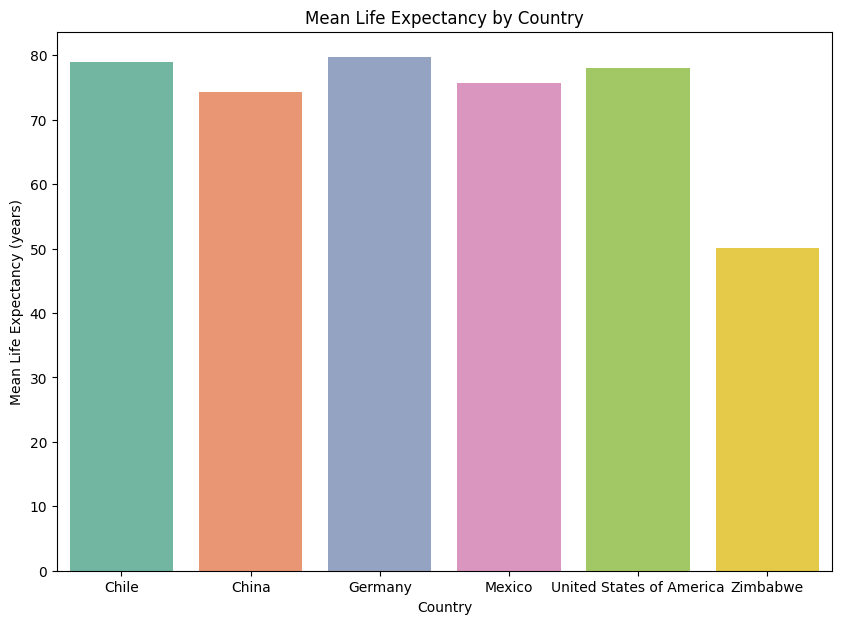

In [29]:
plt.figure(figsize=(10, 7), frameon=True)
sns.barplot(data=df, x='country', y='life_expectancy', hue='country', palette='Set2', errorbar=None)
plt.title('Mean Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Mean Life Expectancy (years)')
plt.show()

### Conclusions from the Mean Life Expectancy Plot:

1. The United States has the highest mean life expectancy, followed by Germany and Chile.
2. Zimbabwe has the lowest mean life expectancy, which is significantly lower than that of the other countries.

Calculating the mean GDP for each country.

In [26]:
df.groupby('country')['gdp'].mean().sort_values(ascending=False)

country
United States of America   14075000000000.00
China                       4957713750000.00
Germany                     3094775625000.00
Mexico                       976650625000.00
Chile                        169788845015.31
Zimbabwe                       9062579595.06
Name: gdp, dtype: float64

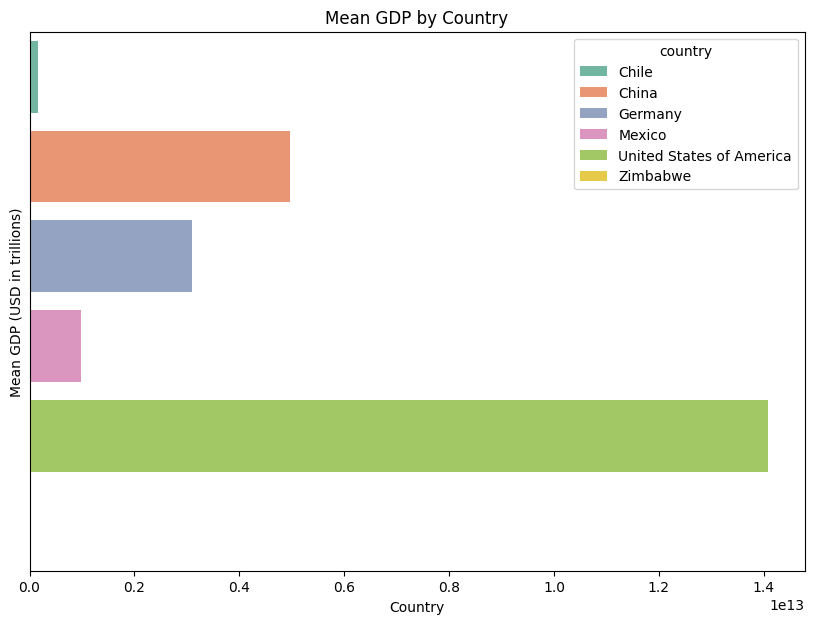

In [37]:
plt.figure(figsize=(10, 7), frameon=True)
sns.barplot(data=df, x='gdp', y='country', hue='country', palette='Set2', errorbar=None, legend=True)
plt.title('Mean GDP by Country')
plt.xlabel('Country')
plt.ylabel('Mean GDP (USD in trillions)')
# removing y-ticks for better readability
plt.yticks([])
plt.show()

### Cоnclusions from the Mean GDP Plot:

1. The United States has the highest mean GDP.
2. Zimbabwe's GDP is extremely low relative to other countries, making it invisible on the graph.